In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from numpy import mean, std
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import model_selection

In [5]:
train_data = pd.read_csv(r'C:\Users\nrebovich\Desktop\Pulsar\pulsar_data_train.csv')
test_data = pd.read_csv(r'C:\Users\nrebovich\Desktop\Pulsar\pulsar_data_test.csv')

In [11]:
train_data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [40]:
test_data.isnull().sum() > 1

 Mean of the integrated profile                  False
 Standard deviation of the integrated profile    False
 Excess kurtosis of the integrated profile        True
 Skewness of the integrated profile              False
 Mean of the DM-SNR curve                        False
 Standard deviation of the DM-SNR curve           True
 Excess kurtosis of the DM-SNR curve             False
 Skewness of the DM-SNR curve                     True
target_class                                      True
dtype: bool

In [41]:
train_data.isnull().sum()
null_columns_train = train_data.columns[[2,5,7]]

for i in null_columns_train:
    train_data[i]=train_data[i].fillna(train_data[i].mean())
    
null_columns_test = test_data.columns[[2,5,7]]

for i in null_columns_test:
    test_data[i]=test_data[i].fillna(test_data[i].mean())

In [42]:
train_data['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [43]:
train_data_fit = train_data.loc[:, ~train_data.columns.isin(['target_class'])]

In [50]:
test_data_fit = test_data.loc[:, ~test_data.columns.isin(['target_class'])]

In [44]:
test_data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


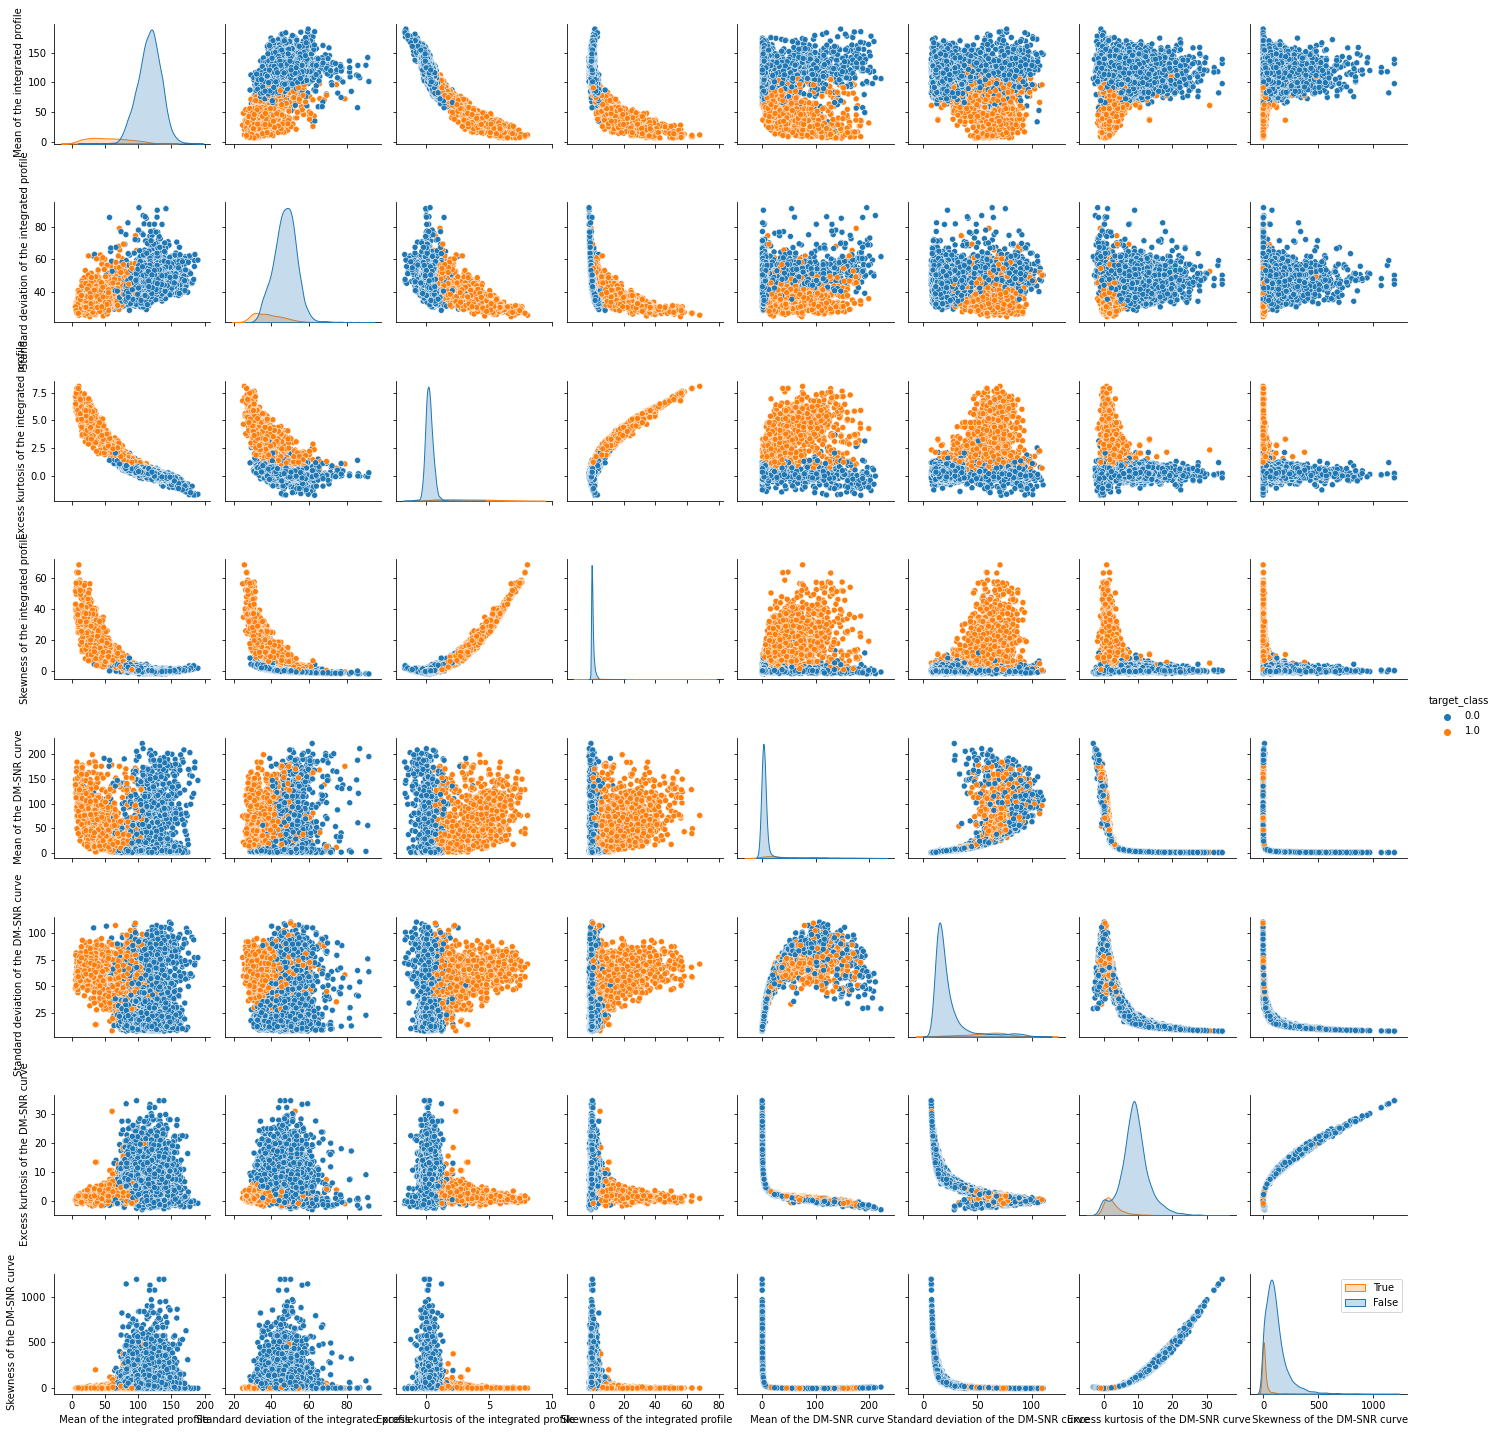

In [15]:
sns.pairplot(train_data, hue="target_class", height=2.5)
plt.legend(labels=["True","False"])
plt.show()

In [45]:
scaler = StandardScaler()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
X = scaler.fit_transform(train_data_fit)
y = train_data['target_class']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)

In [48]:
accuracy_list = []

for i in range(1,10):
    rf = RandomForestClassifier(max_depth=i, random_state=10)
    rf.fit(X_train, y_train)
    rf_scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    avg_score = mean(rf_scores)
    accuracy_list.append(avg_score)
    print('Max Depth %d Accuracy: %.3f (%.3f)' % (i,mean(rf_scores), std(rf_scores)))

Max Depth 1 Accuracy: 0.964 (0.005)
Max Depth 2 Accuracy: 0.973 (0.004)
Max Depth 3 Accuracy: 0.975 (0.004)
Max Depth 4 Accuracy: 0.977 (0.004)
Max Depth 5 Accuracy: 0.976 (0.003)
Max Depth 6 Accuracy: 0.977 (0.003)
Max Depth 7 Accuracy: 0.978 (0.004)
Max Depth 8 Accuracy: 0.978 (0.003)
Max Depth 9 Accuracy: 0.978 (0.004)


In [49]:
rf = RandomForestClassifier(max_depth=4, random_state=10)
rf.fit(X_train, y_train)

rf_scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(rf_scores), std(rf_scores)))

Accuracy: 0.977 (0.004)


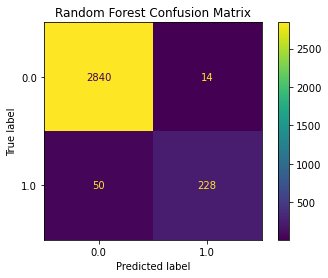

In [51]:
y_pred = cross_val_predict(rf, X_test, y_test, cv=10)

rf_cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm,
           display_labels=rf.classes_)

disp.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

In [52]:
rf_feature_importances = pd.DataFrame(rf.feature_importances_, index =train_data_fit.columns,  columns=['importance']).sort_values('importance', ascending=False)
rf_feature_importances

,importance
Skewness of the integrated profile,0.272643
Excess kurtosis of the integrated profile,0.241371
Mean of the integrated profile,0.232851
Excess kurtosis of the DM-SNR curve,0.075195
Mean of the DM-SNR curve,0.069691
Standard deviation of the DM-SNR curve,0.045537
Standard deviation of the integrated profile,0.045534
Skewness of the DM-SNR curve,0.017178


In [54]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=100,
    random_seed=10,
    learning_rate=0.02,
    custom_loss=['AUC', 'Accuracy']
)

clf.fit(
    X_train, y_train,
    #cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [55]:
clf.score(X_train,y_train)

0.9774372073222648

In [56]:
clf.score(X_test,y_test)

0.9792464878671775

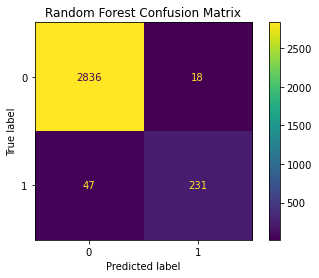

In [57]:
clf_pred = clf.predict(X_test)
cat_cm = confusion_matrix(y_test, clf_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cat_cm)

disp.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

In [74]:
boosted = GradientBoostingClassifier(n_estimators=15, learning_rate=.2,
max_depth=2, random_state=0).fit(X_train, y_train)
boosted_scores = cross_val_score(boosted, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(boosted_scores), std(boosted_scores)))

Accuracy: 0.977 (0.003)


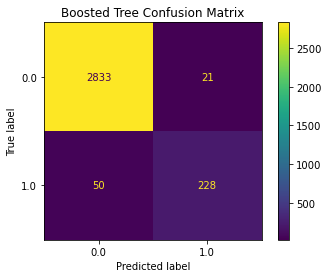

In [75]:
boosted_pred = boosted.predict(X_test)

boosted_cm = confusion_matrix(y_test, boosted_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=boosted_cm,
           display_labels=rf.classes_)

disp.plot()
plt.title('Boosted Tree Confusion Matrix')
plt.show()